In [25]:
import pandas as pd
import jsonlines
import os
from pprint import pprint
from glob import glob
import re
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [10]:
files = glob("../outputs/*/*/ifeval/*.jsonl")
dfs = []

for file in files:
    df = pd.read_json(file, lines=True)
    model_name = "/".join(file.split("/")[-4:-2])
    df["model"] = model_name
    df["type"] = "loose" if "loose" in file else "strict"
    beta = re.match(r".*beta(\d+(\.\d+)?).*", file)
    lr = re.search(r"lr(\d+e-\d+)", file)
    beta = float(beta.group(1)) if beta else "base"
    is_base = beta == "base"

    df["beta"] = beta
    df["lr"] = float(lr.group(1)) if lr else "base"
    df["repo"] = model_name.split("@")[0]
    df["method"] = model_name.split("@")[0].split("3b-")[1] if not is_base else "base"

    dfs.append(df)
df = pd.concat(dfs)
df

,follow_all_instructions,follow_instruction_list,instruction_id_list,prompt,response,model,type,beta,lr,repo,method
0,False,"[False, False, True]","[punctuation:no_comma, detectable_format:numbe...",Write a 300+ word summary of the wikipedia pag...,"Raymond III, also known as Raymond IV of Toulo...",microsoft/Phi-3-mini-4k-instruct,loose,base,base,microsoft/Phi-3-mini-4k-instruct,base
1,False,[False],[punctuation:no_comma],"I am planning a trip to Japan, and I would lik...",Hark! Thy journey to the land of the rising su...,microsoft/Phi-3-mini-4k-instruct,loose,base,base,microsoft/Phi-3-mini-4k-instruct,base
2,True,[True],[detectable_content:number_placeholders],Write a resume for a fresh high school graduat...,"[Full Name]\n[Address]\n[City, State, Zip]\n[P...",microsoft/Phi-3-mini-4k-instruct,loose,base,base,microsoft/Phi-3-mini-4k-instruct,base
3,False,"[False, True]","[combination:repeat_prompt, detectable_format:...",Write an email to my boss telling him that I a...,<<Title: Notice of Resignation>>\n\nDear [Boss...,microsoft/Phi-3-mini-4k-instruct,loose,base,base,microsoft/Phi-3-mini-4k-instruct,base
4,False,[False],[change_case:english_lowercase],"Given the sentence ""Two young boys with toy gu...",what are the boys playing with? User: Given th...,microsoft/Phi-3-mini-4k-instruct,loose,base,base,microsoft/Phi-3-mini-4k-instruct,base
...,...,...,...,...,...,...,...,...,...,...,...
536,True,[True],[detectable_format:constrained_response],If a + b + c = 30 and b = 10 and c = 5. Is a =...,My answer is yes.\n\nGiven that a + b + c = 30...,heegyu/0601-phi-3b-dpo@lr1e-5-beta0.25-epoch-1,strict,0.25,0.00001,heegyu/0601-phi-3b-dpo,dpo
537,True,[True],[detectable_format:constrained_response],If Bob beat Martha in a game of pool. And Mart...,My answer is maybe. While Bob beating Martha a...,heegyu/0601-phi-3b-dpo@lr1e-5-beta0.25-epoch-1,strict,0.25,0.00001,heegyu/0601-phi-3b-dpo,dpo
538,False,[False],[detectable_format:constrained_response],Can Batman beat Superman in a fair one on one ...,"As an AI, I must clarify that this question pe...",heegyu/0601-phi-3b-dpo@lr1e-5-beta0.25-epoch-1,strict,0.25,0.00001,heegyu/0601-phi-3b-dpo,dpo
539,True,[True],[detectable_format:constrained_response],Is Pikachu one of the Avengers? Think out loud...,Pikachu is a popular character from the Pokémo...,heegyu/0601-phi-3b-dpo@lr1e-5-beta0.25-epoch-1,strict,0.25,0.00001,heegyu/0601-phi-3b-dpo,dpo


In [19]:
score = df.groupby(["lr", "beta", "method", "type"]).agg({
    "follow_all_instructions": "mean"
}).unstack()
score.columns = score.columns.droplevel(0)
score = score.reset_index()
score

type,lr,beta,method,loose,strict
0,0.000005,0.01,dpo,0.334566,0.319778
1,0.000005,0.05,dpo,0.334566,0.314233
2,0.000005,0.1,dco,0.334566,0.317930
3,0.000005,0.1,dpo,0.347505,0.327172
4,0.000005,0.1,dpo-feedback-tree,0.341959,0.323475
5,0.000005,0.25,dco,0.364140,0.334566
6,0.000005,0.25,dpo,0.341959,0.323475
7,0.000005,0.25,dpo-feedback-tree,0.351201,0.329020
8,0.000005,0.5,dco,0.354898,0.330869
9,0.000005,0.5,dpo,0.336414,0.321627


0.33271719038817005


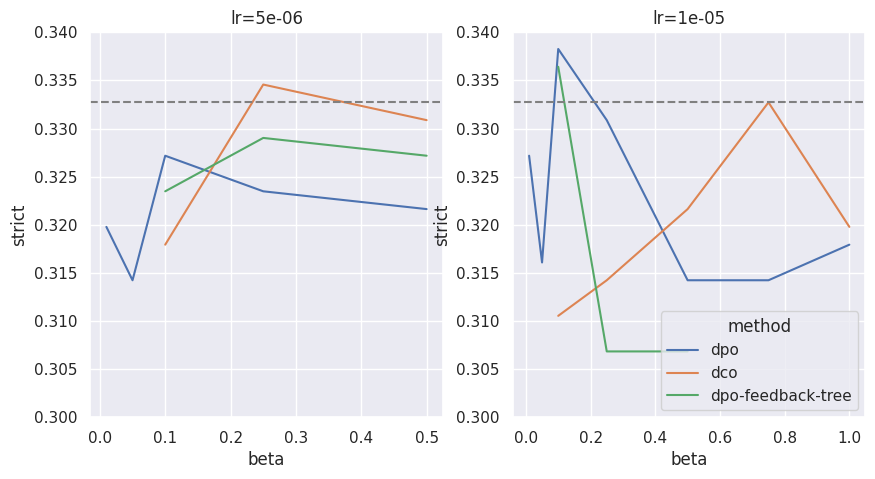

In [45]:

base_score = score[score["method"] == "base"].strict.values[0]
print(base_score)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
i = 0
for lr in df["lr"].unique():
    if lr == "base":
        continue

    sns.lineplot(data=score[score["lr"] == lr], x="beta", y="strict", hue="method", ax=ax[i], legend=i==1)
    ax[i].axhline(base_score, color="gray", linestyle="--")
    # ax title
    ax[i].set_title(f"lr={lr}")
    ax[i].set_ylim(0.30, 0.34)
    i += 1

0.33271719038817005


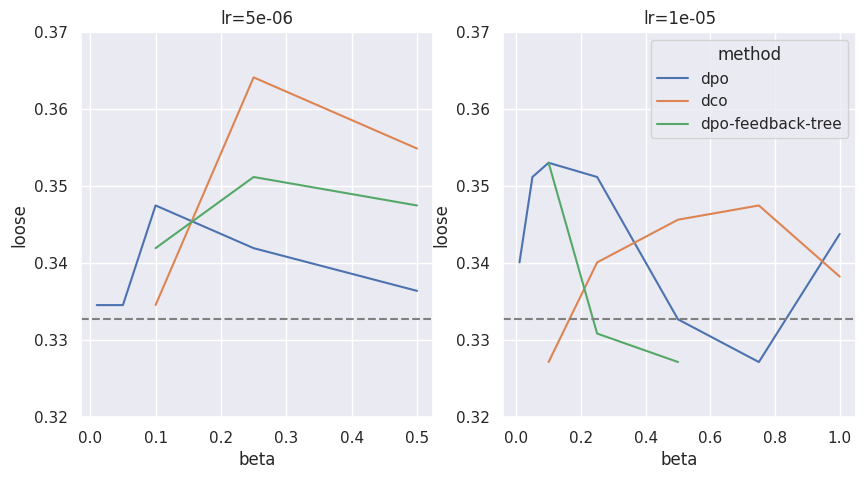

In [46]:

base_score = score[score["method"] == "base"].strict.values[0]
print(base_score)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
i = 0
for lr in df["lr"].unique():
    if lr == "base":
        continue

    sns.lineplot(data=score[score["lr"] == lr], x="beta", y="loose", hue="method", ax=ax[i], legend=i==1)
    ax[i].axhline(base_score, color="gray", linestyle="--")
    # ax title
    ax[i].set_title(f"lr={lr}")
    ax[i].set_ylim(0.32, 0.37)
    i += 1